In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/data.csv', encoding='latin1')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
# fixing the datatype to date datatype
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [8]:
# let's check weather the unite price and the quanty have less than 1 value
df[df['Quantity']<1]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [9]:
df[df['UnitPrice'] <= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,NaN,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,NaN,United Kingdom
538554,581408,85175,NaN,20,2011-12-08 14:06:00,0.0,NaN,United Kingdom


In [10]:
df[df['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


This step identifies records with negative unit prices, which represent accounting adjustments such as bad debt corrections rather than actual sales transactions.

In [11]:
#Check missing descriptions
df['Description'].isna().sum()

1454

In [12]:
df[df['Description'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


Records with missing product descriptions consistently have zero unit price and missing customer IDs, indicating system-generated or adjustment entries rather than genuine customer transactions.

In [13]:
df['CustomerID'].isna().mean() * 100

24.926694334288598

 About 25 percent of our CustomerID are missing meaning CustomerID often means guest checkout so we won't remove this part

# Data Cleaning

#### What we REMOVE
Duplicate rows

Returns / cancellations → Quantity <= 0

Accounting & system entries → UnitPrice <= 0

Non-products → missing Description

#### What we KEEP

Missing CustomerID (guest checkouts)

In [14]:
df_clean = df.copy()

In [15]:
df_clean.shape

(541909, 8)

In [16]:
df_clean.duplicated().sum()

5268

In [17]:
df_clean = df_clean.drop_duplicates()

In [18]:
df_clean.duplicated().sum()

0

Exact duplicate transaction records were identified and removed to prevent double-counting sales.

In [19]:
df_clean = df_clean[df_clean['Quantity']>0]

In [20]:
df_clean.shape

(526054, 8)

In [21]:
df_clean = df_clean[df_clean['UnitPrice'] > 0]

In [22]:
df_clean.shape

(524878, 8)

In [23]:
df_clean['Description'].isna().sum()

0

In [24]:
# Total number of unique products
df_clean['Description'].nunique()

4026

In [25]:
df_clean = df_clean.reset_index(drop = True)

I filtered the dataset to include only genuine sales transactions by keeping rows with positive quantity and positive unit price, which automatically removed system/adjustment entries and missing descriptions, then reset the index for clean analysis.

## Feature creation

In [26]:
# Creating the new column (sales)
df_clean['sales'] = (
    df_clean['Quantity'].astype(float) *
    df_clean['UnitPrice'].astype(float)
)

In [27]:
df_clean[['Quantity','UnitPrice','sales']].head()

,Quantity,UnitPrice,sales
0,6,2.55,15.30
1,6,3.39,20.34
2,8,2.75,22.00
3,6,3.39,20.34
4,6,3.39,20.34


In [28]:
df_clean.InvoiceDate.dtype

dtype('<M8[ns]')

In [29]:
# Tells us which year the sale happened
df_clean['year'] = df_clean.InvoiceDate.dt.year

In [30]:
# Converts month number into month names like January, February.
df_clean['MonthName'] = df_clean.InvoiceDate.dt.month_name()

In [31]:
# Shows which day of the week the sale happened (Monday, Tuesday, etc.)
df_clean['DayName'] = df_clean.InvoiceDate.dt.day_name()

In [32]:
# Extracts the hour of the day
df_clean['hour'] =df_clean.InvoiceDate.dt.hour

In [33]:
df_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sales,year,MonthName,DayName,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,December,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,December,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,December,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,December,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,December,Wednesday,8


In [34]:
# pd.cut divides the hour values into fixed time ranges and labels each range as Night, Morning, Afternoon, 
# or Evening to make time-based analysis easier.
df_clean['PartOfTheDay'] = pd.cut(df_clean['hour'], bins = [0,6,12,18,24], labels=['Night', 'Morning', 'Afternoon', 'Evening'],
    right=False)

In [35]:
df_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sales,year,MonthName,DayName,hour,PartOfTheDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,December,Wednesday,8,Morning
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,December,Wednesday,8,Morning
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,December,Wednesday,8,Morning
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,December,Wednesday,8,Morning
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,December,Wednesday,8,Morning


## Anaysis 
###### Creating columns prepares the data; grouping and interpreting the results is the actual analysis.

In [36]:
# which months generate the most revenue?
monthly_sales = df_clean.groupby('MonthName')['sales'].sum().sort_values(ascending=False).reset_index()
monthly_sales

,MonthName,sales
0,November,1503866.780
1,December,1459243.060
2,October,1151263.730
3,September,1056435.192
4,May,769296.610
5,June,760547.010
6,August,757841.380
7,July,718076.121
8,March,716215.260
9,January,689811.610


In [37]:
# which days are busiest?
day_sales = df_clean.groupby('DayName')['sales'].sum().sort_values(ascending = False).reset_index()
day_sales

,DayName,sales
0,Thursday,2199292.570
1,Tuesday,2175700.511
2,Wednesday,1847074.380
3,Friday,1837470.491
4,Monday,1775782.071
5,Sunday,806790.781


In [38]:
# time of day analysis
# when do customers buy more?
timeofday_sales = df_clean.groupby('PartOfTheDay')['sales'].sum().sort_values(ascending= False).reset_index()
timeofday_sales

,PartOfTheDay,sales
0,Afternoon,6442212.572
1,Morning,3986257.192
2,Evening,213641.040
3,Night,0.000


In [39]:
# in which year there was the highest sale
highest_sale_year = df_clean.groupby('year')['sales'].sum().sort_values(ascending= False).reset_index()
highest_sale_year

,year,sales
0,2011,9820658.074
1,2010,821452.730


In [40]:
# which product generate the most revenue?
top_products = df_clean.groupby('Description')['sales'].sum().sort_values(ascending=False).reset_index()
top_products

,Description,sales
0,DOTCOM POSTAGE,206248.770
1,REGENCY CAKESTAND 3 TIER,174156.540
2,"PAPER CRAFT , LITTLE BIRDIE",168469.600
3,WHITE HANGING HEART T-LIGHT HOLDER,106236.720
4,PARTY BUNTING,99445.230
...,...,...
4021,PINK CRYSTAL GUITAR PHONE CHARM,0.850
4022,VINTAGE BLUE TINSEL REEL,0.840
4023,SET 12 COLOURING PENCILS DOILEY,0.650
4024,HEN HOUSE W CHICK IN NEST,0.420


In [41]:
top_products.tail(10)

,Description,sales
4016,ETCHED GLASS STAR TREE DECORATION,1.250
4017,FUNKY MONKEY MUG,1.250
4018,60 GOLD AND SILVER FAIRY CAKE CASES,1.100
4019,HAPPY BIRTHDAY CARD TEDDY/CAKE,0.950
4020,CAT WITH SUNGLASSES BLANK CARD,0.950
4021,PINK CRYSTAL GUITAR PHONE CHARM,0.850
4022,VINTAGE BLUE TINSEL REEL,0.840
4023,SET 12 COLOURING PENCILS DOILEY,0.650
4024,HEN HOUSE W CHICK IN NEST,0.420
4025,PADS TO MATCH ALL CUSHIONS,0.003


In [42]:
top_products.head(10)

,Description,sales
0,DOTCOM POSTAGE,206248.77
1,REGENCY CAKESTAND 3 TIER,174156.54
2,"PAPER CRAFT , LITTLE BIRDIE",168469.60
3,WHITE HANGING HEART T-LIGHT HOLDER,106236.72
4,PARTY BUNTING,99445.23
5,JUMBO BAG RED RETROSPOT,94159.81
6,MEDIUM CERAMIC TOP STORAGE JAR,81700.92
7,POSTAGE,78101.88
8,Manual,77752.82
9,RABBIT NIGHT LIGHT,66870.03


In [43]:
# which country generates the most sales?
country_sales = df_clean.groupby('Country')['sales'].sum().sort_values(ascending=False).reset_index()
country_sales

,Country,sales
0,United Kingdom,9001744.094
1,Netherlands,285446.340
2,EIRE,283140.520
3,Germany,228678.400
4,France,209625.370
5,Australia,138453.810
6,Spain,61558.560
7,Switzerland,57067.600
8,Belgium,41196.340
9,Sweden,38367.830


In [44]:
# how do sales change over time?
monthly_trend = df_clean.groupby(['year','MonthName'])['sales'].sum().sort_values(ascending=False).reset_index()
monthly_trend

,year,MonthName,sales
0,2011,November,1503866.780
1,2011,October,1151263.730
2,2011,September,1056435.192
3,2010,December,821452.730
4,2011,May,769296.610
5,2011,June,760547.010
6,2011,August,757841.380
7,2011,July,718076.121
8,2011,March,716215.260
9,2011,January,689811.610


In [45]:
# customer spending behavior
customer_sales = df_clean.dropna(subset=['CustomerID']).groupby('CustomerID')['sales'].sum().sort_values(ascending = False).reset_index()
customer_sales

,CustomerID,sales
0,14646.0,280206.02
1,18102.0,259657.30
2,17450.0,194390.79
3,16446.0,168472.50
4,14911.0,143711.17
...,...,...
4333,16878.0,13.30
4334,17956.0,12.75
4335,16454.0,6.90
4336,14792.0,6.20


In [46]:
# segmenting customer spending behavior
customer_sales['CustomerSegment'] = pd.qcut(customer_sales['sales'], q= 3, labels =['Low Value', 'midium value', 'High Value'])
customer_sales

,CustomerID,sales,CustomerSegment
0,14646.0,280206.02,High Value
1,18102.0,259657.30,High Value
2,17450.0,194390.79,High Value
3,16446.0,168472.50,High Value
4,14911.0,143711.17,High Value
...,...,...,...
4333,16878.0,13.30,Low Value
4334,17956.0,12.75,Low Value
4335,16454.0,6.90,Low Value
4336,14792.0,6.20,Low Value


In [47]:
# Day vs Time
Day_time_pivot_table = df_clean.pivot_table(values = 'sales', index ='DayName', columns ='PartOfTheDay', aggfunc ='sum')
Day_time_pivot_table

PartOfTheDay,Night,Morning,Afternoon,Evening
DayName,,,,
Friday,0.0,839501.101,997501.660,467.73
Monday,0.0,611015.190,1162205.791,2561.09
Sunday,0.0,229767.240,577023.541,0.00
Thursday,0.0,734586.230,1287575.820,177130.52
Tuesday,0.0,888122.451,1270021.260,17556.80
Wednesday,0.0,683264.980,1147884.500,15924.90


In [48]:
df_clean

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sales,year,MonthName,DayName,hour,PartOfTheDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,December,Wednesday,8,Morning
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,December,Wednesday,8,Morning
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,December,Wednesday,8,Morning
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,December,Wednesday,8,Morning
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,December,Wednesday,8,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524873,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011,December,Friday,12,Afternoon
524874,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011,December,Friday,12,Afternoon
524875,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,December,Friday,12,Afternoon
524876,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,December,Friday,12,Afternoon


# Visualization

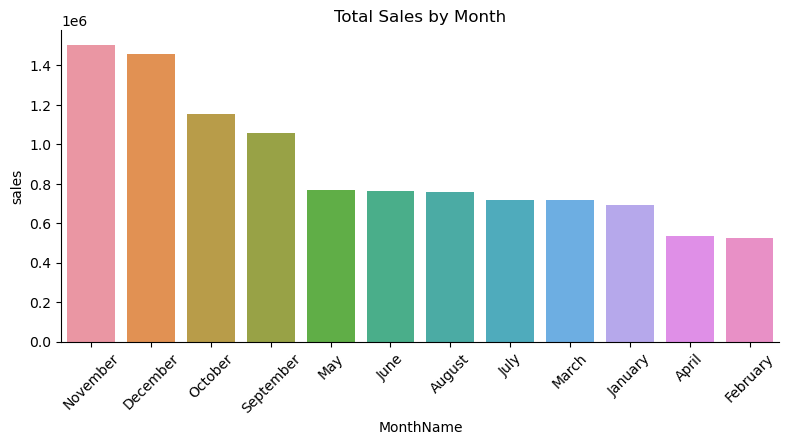

In [49]:
sns.catplot(data = monthly_sales, kind= 'bar', y='sales', x= 'MonthName', height = 4, aspect = 2)
plt.title('Total Sales by Month')
plt.xticks(rotation = 45)
plt.show()

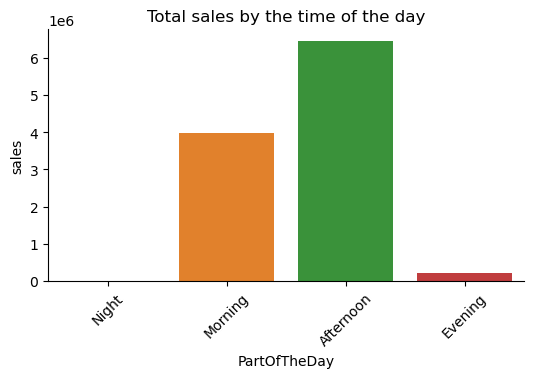

In [50]:
g = sns.catplot(data=timeofday_sales, kind='bar', x= 'PartOfTheDay', y= 'sales',height=3.4, aspect=1.6)
for ax in g.axes.flat:
    ax.set(title='Total sales by the time of the day')
    ax.tick_params('x', rotation=45)

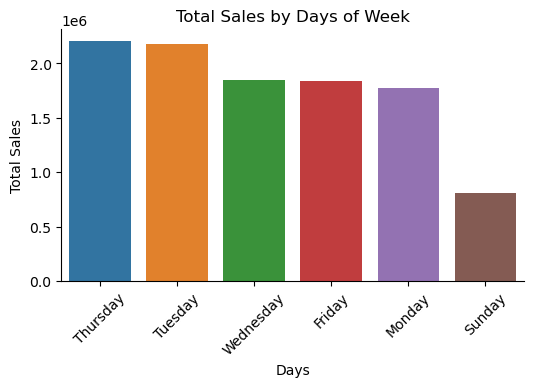

In [51]:
# Sales by Day of Week
g = sns.catplot(kind ='bar', data=day_sales, x='DayName', y='sales',height=3.4, aspect=1.6)
for ax in g.axes.flat:
    ax.set(title='Total Sales by Days of Week', ylabel='Total Sales', xlabel='Days')
    ax.tick_params('x', rotation=45)

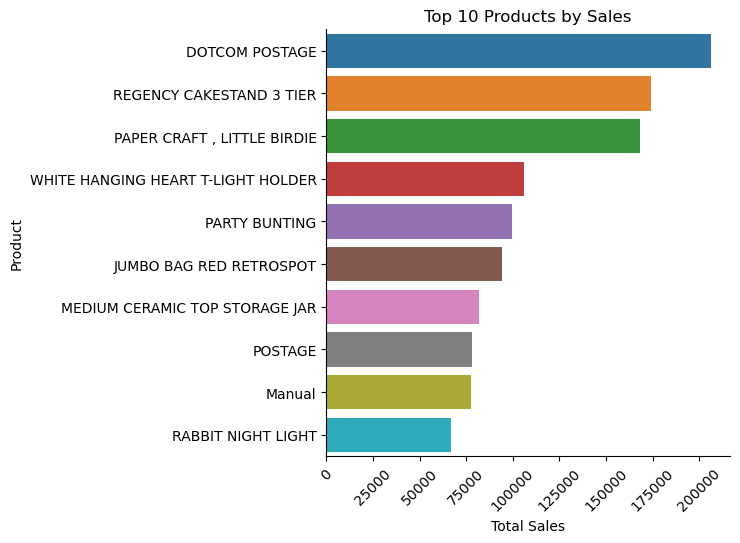

In [52]:
top_10_products = top_products.head(10)
g = sns.catplot(
    data = top_10_products, x = 'sales', y='Description', kind = 'bar',height = 5,aspect = 1.5)
for ax in g.axes.flat:
    ax.set(title ='Top 10 Products by Sales', xlabel ='Total Sales', ylabel = 'Product')
    ax.tick_params('x', rotation = 45)

In [53]:
lowest_selling_10_items = top_products.tail(10)
lowest_selling_10_items

,Description,sales
4016,ETCHED GLASS STAR TREE DECORATION,1.250
4017,FUNKY MONKEY MUG,1.250
4018,60 GOLD AND SILVER FAIRY CAKE CASES,1.100
4019,HAPPY BIRTHDAY CARD TEDDY/CAKE,0.950
4020,CAT WITH SUNGLASSES BLANK CARD,0.950
4021,PINK CRYSTAL GUITAR PHONE CHARM,0.850
4022,VINTAGE BLUE TINSEL REEL,0.840
4023,SET 12 COLOURING PENCILS DOILEY,0.650
4024,HEN HOUSE W CHICK IN NEST,0.420
4025,PADS TO MATCH ALL CUSHIONS,0.003


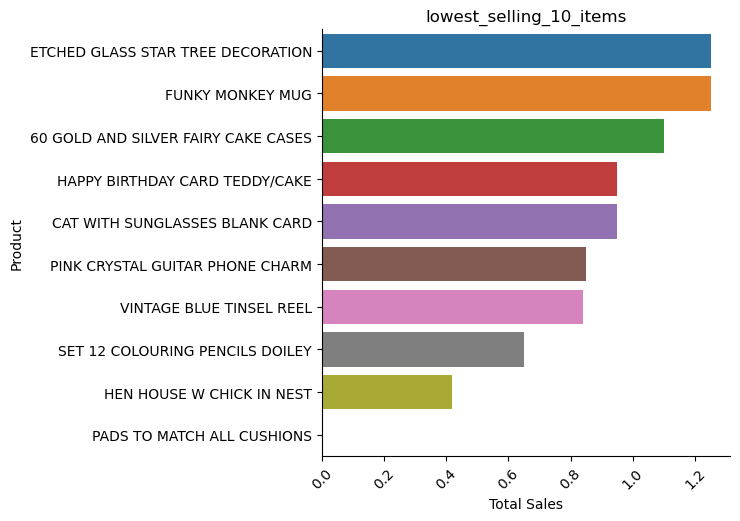

In [54]:
g = sns.catplot(
    data = lowest_selling_10_items, x = 'sales', y='Description', kind = 'bar',height = 5,aspect = 1.5)
for ax in g.axes.flat:
    ax.set(title ='lowest_selling_10_items', xlabel ='Total Sales', ylabel = 'Product')
    ax.tick_params('x', rotation = 45)

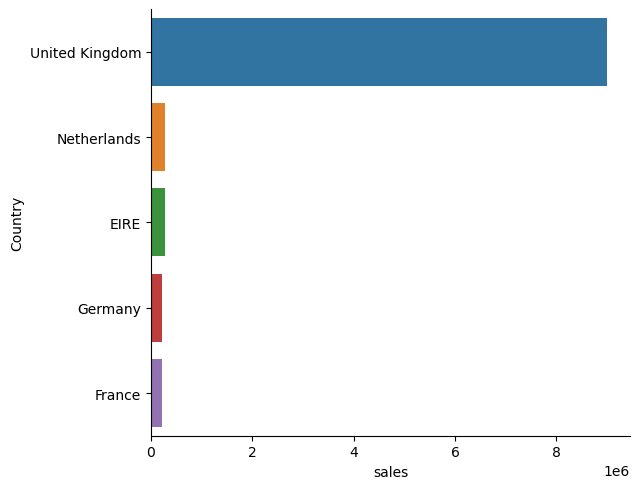

In [55]:
# visualization countries generate the most sales
sns.catplot(data = country_sales.head(), x='sales', y= 'Country', kind ='bar', height = 5, aspect=1.3)


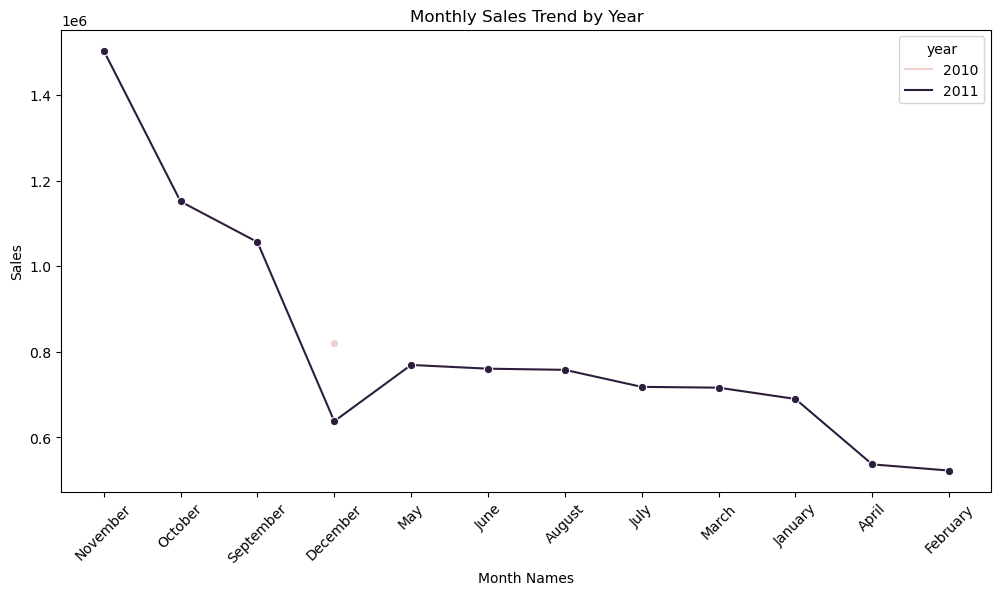

In [56]:
plt.figure(figsize =(12,6))
ax = sns.lineplot(data = monthly_trend, x= 'MonthName', y= 'sales', hue= 'year', marker='o')
ax.set(title ='Monthly Sales Trend by Year', xlabel ='Month Names', ylabel = 'Sales')
ax.tick_params('x', rotation = 45)

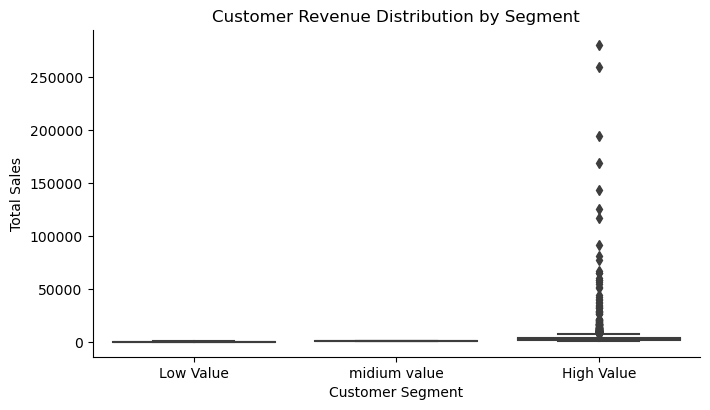

In [57]:
g = sns.catplot(data = customer_sales, x='CustomerSegment', y='sales', kind = 'box', height = 4, aspect = 1.8)
for ax in g.axes.flat:
    ax.set(title='Customer Revenue Distribution by Segment', xlabel= 'Customer Segment', ylabel= 'Total Sales')

[Text(0.5, 1.0, 'Sales Heatmap: Day vs Time of Day')]

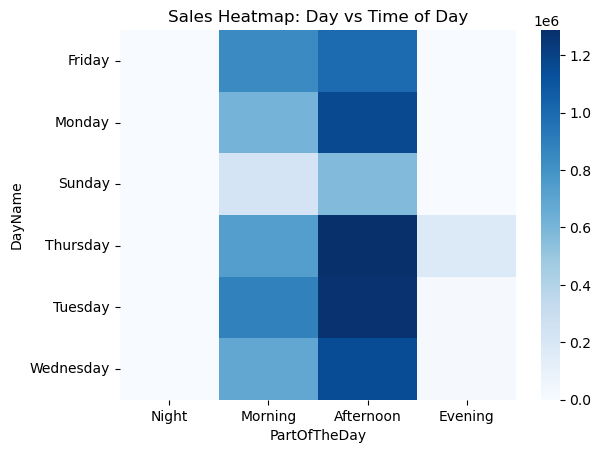

In [58]:
ax = sns.heatmap(data = Day_time_pivot_table, cmap ='Blues', fmt='.0f')
ax.set(title = 'Sales Heatmap: Day vs Time of Day')